### During DNA replication of the *E. coli* genome, C is more frequent on the reverse half-strand and less frequent on the forward half-strand. Conversely, G is less frequent on the reverse half-strand and more frequent on the forward half-strand. This is because C tends to mutate into T via deamination. This mutation rate rises 100-fold when DNA is single stranded (the forward half-strand spends much more time in a single stranded state since it has to wait for the replication fork to become large enough, and adds nucleotides in Okazaki fragments). We can use these statistics to locate *ori* by traversing the genome and keeping a running total of the difference between G and C. If the difference increases, we are on the forward half-strand, and vice versa.

In [101]:
def skew(genome):
    skew_vals = [0]
    for nucleotide in genome:
        # if C, subtract one from previous value
        if nucleotide == 'C':
            skew_vals.append(skew_vals[-1] - 1)
        # if G, add one to previous value
        elif nucleotide == 'G':
            skew_vals.append(skew_vals[-1] + 1)
        # if A or T, simply retain the previous value
        else:
            skew_vals.append(skew_vals[-1])
    return skew_vals

def min_skew_positions(genome):
    skew_vals = skew(genome)
    min_skew_val = min(skew_vals)
    # List comprehension to obtain all minimum skew value indices
    # enumerate() returns an index, value pair (i, skew) in the iterable (skew_val list)
    positions = [i for i, skew in enumerate(skew_vals) if skew == min_skew_val]
    return positions



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30277_10.txt'
with open(file_path, 'r') as file:
    Genome = file.readline().strip()

min_positions = min_skew_positions(Genome)
print(f"Minimum skew positions (indices): {min_positions}")

Minimum skew positions (indices): [53976, 53977]


### Plotting the results of the skew function

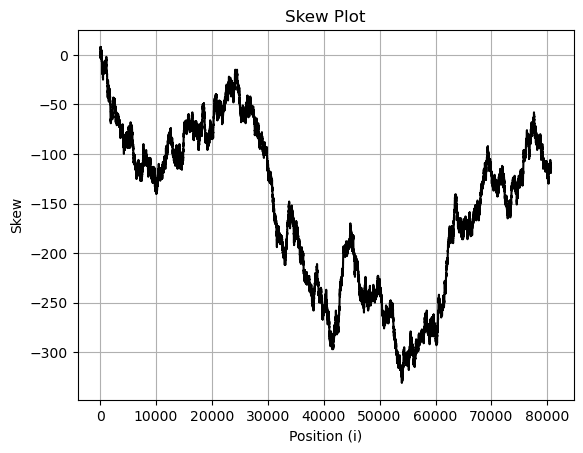

In [51]:
import matplotlib.pyplot as plt

def plot_skew(genome):
    # y-axis
    skew_vals = skew(genome)
    # x-axis
    positions = range(len(genome) + 1)    
    plt.plot(positions, skew_vals, color='black')
    plt.xlabel('Position (i)')
    plt.ylabel('Skew')
    plt.title('Skew Plot')
    plt.grid(True)
    plt.show()
    
plot_skew(genome)

### DnaA is a protein that initiates DNA replication in bacteria. A DnaA box is a common motif present within *ori* that DnaA binds to. DnaA boxes can vary slightly, and DnaA can sometimes still bind to these variant sequences.

### Position i in k-mers p1 … pk and q1 … qk is a mismatch if pi ≠ qi. For example, CGAAT and CGGAC have two mismatches. The number of mismatches between strings p and q is called the Hamming distance between these strings and is denoted HammingDistance(p, q).

In [99]:
# Computing the Hamming distance between 2 strings

def Hamming_Distance(p, q):
    # Make sure the strings have the same length
    if len(p) != len(q):
        raise ValueError("Strings must have the same length")
    differences = 0
    # zip() takes iterables and returns tuples of the i-th element from each iterable
    for i, j in zip(p, q):
        if i != j:
            differences += 1
    return differences

# More efficient HammingDistance function using list comprehension
def HammingDistance(p, q):
    if len(p) != len(q):
        return -1  # Invalid input, return an error code
    return sum([1 for nucleotide in range(len(p)) if p[nucleotide] != q[nucleotide]])



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_3.txt'
with open(file_path, 'r') as file:
    Seq1 = file.readline().strip()
    Seq2 = file.readline().strip()

print(f"Sequence 1:\n", Seq1, f"\nSequence 2:\n", Seq2, "\n", f"Hamming distance / number of mismatches between sequence 1 and 2: {HammingDistance(Seq1, Seq2)}", sep='')

Sequence 1:
TAGCTTTCCAACTCTCTCAAGAACGGCCATGGGTATTTACGTGCCGCAGCCTGGATCAGTATAACACCACAATGGCAGTGATGTGTAGTCTCCGACATCAACTCCATACCGGCGGTTCGTCGTCTTCAAGGTGTCTCCTCGTCGTCAACCTCTCCTTCGGTGCTCTGACGCCCAGTAGAGATCTCAGGCCACATAAGGGGGCTGGAAAGTCAGTCGAAATTACTATTCCTGCCCCGAGACTCCCCCGATTATTCCTGGCTATGTGTTTGGACCGTCGGTACACGTCACATTCTTCCGCACCTGGGCCAGGACATGATGTAGCATATTTAGACTAAGGAGAGATAGTTTTGTCGCCGCCTGGAAAACAACTTCGTATACGCGGGGAAAGTCAAGAGCTCTCCAGGGAACCATATGGGCCTCTAGTGTTTAACGAGGGGGGGATACTGTATATCGTCACTGAACAATACACTACGTTTAACTCTGAGTACAATCCTGTCATATGCCTCCCTAACGGTTGGAGCTAAAATGATTCTCGTGGCGGACGTTCGATTCTCATGAGGGTATGTCGGTCAAGAAGAATATTGATGGTTACTAATCTGTCGCGAAATGCTAGTAGATACGGTCGATGCCTTAGGATCACTGCATCCTCGCTGAACCCTTAATTTGTTAGCAGCGGAGAACTCTAGGTTAGCAGGGGCGTCCCCAAAGTTCAAGGGTTCGCAGGCGAAGCATAATTCTCGGACGAAGTTTCATTTTGGTATGTCGCGATGGGTTTCCGGTGCTTTGCACGACAGCAGCAGAAGAAATACAAAGGTAGCCGACAAGCGGAACATGTATGAAACGAAGTGACAGGACACCAAGCCATCGGACCCGAACGTTCTGATCCAGCGGAGATATGTATGTGATGTCTCTGCCCTTCACGGTGGATGTACTCGGTGTTGTCTTGCCGACTGCGTTCGGAGTCGGCTGGGCCCGGCATCAAGGACCT

### A k-mer *Pattern* appears as a substring of *Sequence* with at most *d* mismatches if there is some k-mer substring *Pattern'* of *Sequence* having *d* or fewer mismatches with *Pattern*, i.e., HammingDistance(Pattern, Pattern') ≤ d.

In [91]:
# Finding all approximate occurrences of a pattern in a string
    
def approx_patterns(pattern, seq, d):
    pattern_len = len(pattern)
    seq_len = len(seq)
    
    positions = []
    # Sliding window
    for i in range(len(seq) - len(pattern) + 1):
        if HammingDistance(pattern, seq[i:i + len(pattern)]) <= int(d):
            positions.append(i)
    return ' '.join(map(str, positions))



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_4.txt'
with open(file_path, 'r') as file:
    Pattern = file.readline().strip()
    Seq = file.readline().strip()
    D = file.readline().strip()

print(f"Locations (indices) of {Pattern} with {D} or fewer mismatches:\n", approx_patterns(Pattern, Seq, D), sep='')

Locations (indices) of CATTACTGT with 6 or fewer mismatches:
0 2 5 10 11 15 17 20 22 23 25 26 28 29 30 32 34 37 39 43 45 50 52 55 59 60 70 72 77 81 86 89 91 94 95 99 101 103 104 107 110 112 115 120 123 125 128 129 130 133 134 145 146 148 149 150 154 157 158 161 171 174 175 177 181 182 183 186 187 188 189 190 192 193 194 198 201 202 211 212 215 218 221 225 226 227 230 231 232 234 235 238 243 251 254 256 257 262 263 264 268 269 271 277 278 280 282 283 284 287 289 292 294 297 298 300 302 305 307 308 309 311 312 315 316 319 321 322 324 325 329 333 334 335 337 344 347 350 351 352 355 357 360 364 365 366 367 369 371 373 376 381 382 385 389 392 395 400 403 407 408 409 411 413 414 416 417 418 421 423 427 429 436 438 439 440 441 443 444 450 455 456 457 465 468 470 473 481 483 484 487 489 491 493 494 496 497 499 500 503 505 506 509 513 514 516 517 518 525 531 534 535 536 537 538 540 541 542 545 546 547 550 551 555 561 566 567 569 570 573 576 582 583 585 587 589 592 593 594 597 603 607 609 612 61

### Tweaking PatternCount() to count occurrences of a pattern with *d* or fewer mismatches

In [89]:
def ApproxPatternCount(seq, pattern, d):
    positions = []
    for nuc in range(len(seq) - len(pattern) + 1):
        # Sliding window
        if HammingDistance(pattern, seq[nuc:nuc + len(pattern)]) <= int(d):
            positions.append(nuc)
    return len(positions)



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_6.txt'
with open(file_path, 'r') as file:
    K = file.readline().strip()
    Seq = file.readline().strip()
    D = file.readline().strip()

approx_occurrences = ApproxPatternCount(Seq, Pattern, D)
print(f"Occurrences of {Pattern} with {D} or fewer mismatches: {approx_occurrences}")

Occurrences of AACCTCGTA with 2 or fewer mismatches: 1


### Counting the most frequent k-mer pattern occurrences with mismatches
> ### The collection of all such k-mers is called the d-neighborhood of Pattern, denoted Neighbors(Pattern, d).

In [ ]:
# Pseudocode

FrequentWordsWithMismatches(Seq, k, d)
    Patterns ← an array of strings of length 0
    freqMap ← empty map
    n ← |Seq|
    for i ← 0 to n - k
        Pattern ← Seq(i, k)
        neighborhood ← Neighbors(Pattern, d)
        for j ← 0 to |neighborhood| - 1
            neighbor ← neighborhood[j]
            if freqMap[neighbor] doesn't exist
                freqMap[neighbor] ← 1
            else
                freqMap[neighbor] ← freqMap[neighbor] + 1
    m ← MaxMap(freqMap)
    for every key Pattern in freqMap
        if freqMap[Pattern] = m
            append Pattern to Patterns
    return Patterns

In [72]:
from itertools import product

def freq_kmers_with_mismatches(seq, k, d):
    patterns = []
    freq_map = {}

    # Generate all possible neighbors of a pattern with d or fewer mismatches
    # Where a neighbor is a DNA sequence that differs from the k-mer by d or fewer mismatches
    def neighbors(pattern, d):
        nucleotides = 'ACGT'
        neighborhood = set()

        # For all possible positions in the k-mer where d or fewer mismatches can occur
            # product() finds all possible iterations of a sequence of letters/numbers
            # Here, I'm generating all possible mismatches (up to d) in a k-mer pattern of a given length
        for mismatched_indices in product(range(len(pattern)), repeat=d):
            # For all possible nucleotides that could be used to create d or fewer mismatches in the k-mer
            for mismatches in product(nucleotides, repeat=d):
                # Converting the k-mer from a string to a list
                neighbor = list(pattern)
                # Combine elements from mismatched_indices and mismatches as tuples, e.g. (1, C), (2, A), etc.
                    # Where mismatch is the letter/nucleotide at the given index
                for index, mismatch in zip(mismatched_indices, mismatches):
                    # Update the potential mismatched k-mer
                    neighbor[index] = mismatch
                # Add the potential mismatched k-mer to neighborhood
                # neighborhood is now a set of all possible mismatch variations up to d for given k-mer
                neighborhood.add(''.join(neighbor))
        return list(neighborhood)

    for i in range(len(seq) - int(k) + 1):
        # Sliding window = pattern length (k)
        # Set each window = a pattern
        pattern = seq[i:i + int(k)]
        # Function call to generate all possible neighbors of a pattern with up to d mismatches
        # neighborhood becomes a list of all possible mismatch variations of each pattern in our DNA sequence
        neighborhood = neighbors(pattern, int(d))
        for neighbor in neighborhood:
            # Set all patterns = 0 in freq_map
            if neighbor not in freq_map:
                freq_map[neighbor] = 0
            # If pattern is found, increment in freq_map
            else:
                freq_map[neighbor] += 1
                
    # Find most occurring k-mer with d or fewer mismatches and add it to patterns
    patterns = [pattern for pattern, freq in freq_map.items() if freq == max(freq_map.values())]
    return ' '.join(patterns)



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_9.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    K = file.readline().strip()
    D = file.readline().strip()

print(f"Most frequent {K}-mer with {D} or fewer mismatches: ", freq_kmers_with_mismatches(Seq, K, D), sep='')

Most frequent 6-mer with 3 or fewer mismatches: CTTCTT


In [73]:
# Obtaining the reverse compliment of a DNA sequence
def rev_comp_seq(seq):
    # Assign complimentary letters
    comp_dict = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
    # Replace each nucleotide with its complementary letter
    comp_seq = ''.join(comp_dict[n] for n in seq)
    # Reverse the entire string
    rev_comp_seq = comp_seq[::-1]
    return rev_comp_seq

def freq_kmers_with_mismatches_revcomp(seq, k, d):
    patterns = []
    freq_map = {}

    def neighbors(pattern, d):
        nucleotides = 'ACGT'
        neighborhood = set()

        for mismatched_indices in product(range(len(pattern)), repeat=d):
            for mismatches in product(nucleotides, repeat=d):
                neighbor = list(pattern)
                for index, mismatch in zip(mismatched_indices, mismatches):
                    neighbor[index] = mismatch
                neighborhood.add(''.join(neighbor))
        return list(neighborhood)

    for i in range(len(seq) - int(k) + 1):
        pattern = seq[i:i + int(k)]
        # Generate the pattern's reverse compliment
        pattern_rc = rev_comp_seq(pattern)
        neighborhood = neighbors(pattern, int(d))
        # Generate a neighborhood of reverse compliments
        neighborhood_rc = [rev_comp_seq(n) for n in neighborhood]
        
        for neighbor in neighborhood + neighborhood_rc:
            if neighbor not in freq_map:
                freq_map[neighbor] = 1
            else:
                freq_map[neighbor] += 1

    max_freq = max(freq_map.values())
    patterns = [pattern for pattern, freq in freq_map.items() if freq == max_freq]
    return ' '.join(patterns)



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_10.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    K = file.readline().strip()
    D = file.readline().strip()

print(f"Most frequent {K}-mer with {D} or fewer mismatches and its reverse compliment: ", freq_kmers_with_mismatches_revcomp(Seq, K, D), sep='')

Most frequent 6-mer with 2 or fewer mismatches and its reverse compliment: ACGACG CGTCGT


### Our goal is to generate the d-neighborhood Neighbors(Pattern, d), the set of all k-mers whose Hamming distance from Pattern does not exceed d.
> ### Warm up: Generating the 1-neigborhood of Pattern using the following pseudocode.

In [ ]:
# Pseudocode

ImmediateNeighbors(Pattern)
        Neighborhood ← the set consisting of single string Pattern
        for i = 1 to |Pattern|
            symbol ← i-th nucleotide of Pattern
            for each nucleotide x different from symbol
                Neighbor ← Pattern with the i-th nucleotide substituted by x
                add Neighbor to Neighborhood
        return Neighborhood

In [ ]:
# Pseudocode
# Where '• Text' denotes the concatenation of a character symbol and a string Text, e.g., A•GCATG = AGCATG

Neighbors(Pattern, d)
        if d = 0
            return {Pattern}
        if |Pattern| = 1 
            return {A, C, G, T}
        Neighborhood ← an empty set
        SuffixNeighbors ← Neighbors(Suffix(Pattern), d)
        for each string Text from SuffixNeighbors
            if HammingDistance(Suffix(Pattern), Text) < d
                for each nucleotide x
                    add x • Text to Neighborhood
            else
                add FirstSymbol(Pattern) • Text to Neighborhood
        return Neighborhood

In [88]:
# Generates all possible neighbors of a pattern with d or fewer mismatches
def neighbors(pattern, d):
    nucleotides = 'ACGT'
    
    # Case: d = 0
    if d == 0:
        return {pattern}
    # Case: pattern is 1 letter
    if len(pattern) == 1:
        return set(nucleotides)

    # Case: d > 0 and pattern > 1 letter
    neighborhood = set()
    # Starting with possible mismatches at the first letter, keeping the suffix of the pattern the same
    # Then, use recursion to iterate over all possible mismatches at each remaining letter index
    suffix_neighbors = neighbors(pattern[1:], d)

    for neighbor in suffix_neighbors:
        # If the Hamming distace of the suffix is < d, the neighbor differs by at most d mismatches
        if HammingDistance(pattern[1:], neighbor) < int(d):
            for nucleotide in nucleotides:
                # Concatenate each of the four nucleotides to the suffix of the pattern
                neighborhood.add(nucleotide + neighbor)
        else:
            neighborhood.add(pattern[0] + neighbor)
    return list(neighborhood)


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30282_4.txt'
with open(file_path, 'r') as file:
    Pattern = file.readline().strip()
    D = file.readline().strip()

print(f"{D}-Neighborhood of {Pattern}:\n{' '.join(neighbors(Pattern, D))}")

2-Neighborhood of AACCTCGTA:
AACCTCCGA AACCTCCTA GCCCTCGTA AAGTTCGTA CACCTCGTG AAACTTGTA AACCTTGTA AACCTCGAG AACGTCGGA AACCTCGGT AACCTCCAA TACCTTGTA AAGCTCGGA AACCTTCTA AACCTCGTC ATCGTCGTA AACCTCCTG ATCCTCGTT AACTTCGTA TACCACGTA AACTGCGTA ACCCGCGTA CAGCTCGTA ATCCTCGTG GAGCTCGTA AACATCCTA AACCTCTTG AACTTTGTA AACTTCGGA GACCTAGTA AAGCTCTTA ACCCTCATA AATATCGTA AACCACGAA AACCCAGTA AAACTCGGA TACCTCGGA AAACTAGTA TACCTCCTA AACCTCGCT AGCCTCGTC AATCTCGGA AACCTCTTA CACCTCGTA ATCCTCGCA AACCCGGTA AATCTCCTA AACCTCGTA AACATCGCA AACCTCGGG AACCTTTTA GACCTCGTG AACCCCGCA ACCCCCGTA AAGCTTGTA TCCCTCGTA AACCTCGCC AACACCGTA AAAGTCGTA AATCCCGTA AACGTCCTA AACCTAGTT AAGCCCGTA CACCTAGTA AACGTCGCA AACCTCTTC TACCTCGTT AACTTCCTA AACCTGTTA GACGTCGTA AACCTCATG AATCTCGAA AACCGCGGA AGCGTCGTA ACCCTCGAA AACCTTGTG AACCAAGTA CACCTTGTA TACCCCGTA AACCTCGCA AACCTCCTC TACCGCGTA AACATAGTA CGCCTCGTA TACCTCGTA AATCTCGTA AACCTCTCA ATCCTAGTA AACCTGGCA AGCTTCGTA AACCGAGTA AACCTCCTT ATCCTCTTA AAGCTCGTT AACAGCGTA AAACTCGTA AACTTCGTG A